# CPABE Demo
This notebook demo the ABE scenario for delta project. The scenario is illustrated as follows:

## Client
We will have 3 client accounts in PC or notebook with the following attribute

A: IT & exec > 7                   -- 可以看1跟2

B: strategy & manager              -- 可以看1

C: IABG_team & Hire date = 2008    -- 可以看2

## Gateway
We will have two gateway one in MiniITX, the other in ZC702 from Delta. 

Access tree of camera1:
![](https://i.imgur.com/2wzXq4i.png)
Access tree of camera2:
![](https://i.imgur.com/SGGbnzL.png)

## ABE server
The basic abe contains four steps as shown in the figure
![](https://i.imgur.com/9IY1Kz4.png)

### (1) Setup
Authorities create a set of public parameters including public key and a master key 

In [1]:
%%bash 
./cpabe-setup
ls -la master_key pub_key

Starting Setup
Setup Complete
-rw-r--r-- 1 7171577fa3304f468f6d303bd01a7bdc 7171577fa3304f468f6d303bd01a7bdc 156 May 29 06:57 master_key
-rw-r--r-- 1 7171577fa3304f468f6d303bd01a7bdc 7171577fa3304f468f6d303bd01a7bdc 888 May 29 06:57 pub_key


### (2) Key generation
The authorities takes a set of attributes which has been authenticated, the master key MK, and the public key to output a decryption key SK. 
According to their attributes, each client will have his own private key

In [2]:
%%bash 
./cpabe-keygen -o AA_priv_key pub_key master_key IT 'executive_level = 7'
ls -la AA_priv_key

Computation took 0.563459 seconds
-rw-r--r-- 1 7171577fa3304f468f6d303bd01a7bdc 7171577fa3304f468f6d303bd01a7bdc 24725 May 29 06:58 AA_priv_key


In [3]:
%%bash
./cpabe-keygen -o BB_priv_key pub_key master_key strategy manager
ls -la BB_priv_key

Computation took 0.020992 seconds
-rw-r--r-- 1 7171577fa3304f468f6d303bd01a7bdc 7171577fa3304f468f6d303bd01a7bdc 681 May 29 06:58 BB_priv_key


In [4]:
%%bash
./cpabe-keygen -o CC_priv_key pub_key master_key director IABG_team 'hire_date = 2008'
ls -la CC_priv_key

Computation took 0.578677 seconds
-rw-r--r-- 1 7171577fa3304f468f6d303bd01a7bdc 7171577fa3304f468f6d303bd01a7bdc 24588 May 29 06:59 CC_priv_key


### (3) Encryption
The gateway encrypt a internally random generated session key, with a set of attributes, and the public key. It outputs the ciphertext

In [5]:
%%bash
./cpabe-enc -o camera1 pub_key "((strategy or DRC_team) and (hire_date < 2012 or manager)) or (2 of (executive_level >= 5, sales, IT))"
ls -la camera1
cat camera1

-rw-r--r-- 1 7171577fa3304f468f6d303bd01a7bdc 7171577fa3304f468f6d303bd01a7bdc 66 May 29 07:00 camera1
04CDC2BEBA7D40EF598AEC397DB983D5
D1400E72C3E7EEDE31AC90AE91F3853B


In [6]:
%%bash
./cpabe-enc -o camera2 pub_key "(IABG_team and (hire_date < 2009 or manager)) or (2 of (executive_level >= 5, sales, IT))"
ls -la camera2
cat camera2

-rw-r--r-- 1 7171577fa3304f468f6d303bd01a7bdc 7171577fa3304f468f6d303bd01a7bdc 66 May 29 07:00 camera2
6340F27BC1C718B46D48F1ED1418F54D
CED41BFB064AB00B9D47BC327631D63B


### (4) Decryption
The client takes ciphertext, private key, and public key.  It then outputs session key if they satisfy the access policy.

In [7]:
%%bash
./cpabe-dec pub_key AA_priv_key camera1.cpabe -o camera1_AA_key
ls -la camera1_AA_key
cat camera1_AA_key

-rw-r--r-- 1 7171577fa3304f468f6d303bd01a7bdc 7171577fa3304f468f6d303bd01a7bdc 66 May 29 07:00 camera1_AA_key
04CDC2BEBA7D40EF598AEC397DB983D5
D1400E72C3E7EEDE31AC90AE91F3853B


In [8]:
%%bash
./cpabe-dec pub_key AA_priv_key camera2.cpabe -o camera2_AA_key
ls -la camera1_AA_key
cat camera2_AA_key

-rw-r--r-- 1 7171577fa3304f468f6d303bd01a7bdc 7171577fa3304f468f6d303bd01a7bdc 66 May 29 07:00 camera1_AA_key
6340F27BC1C718B46D48F1ED1418F54D
CED41BFB064AB00B9D47BC327631D63B


In [9]:
%%bash
./cpabe-dec pub_key BB_priv_key camera1.cpabe -o camera1_BB_key
ls -la camera1_BB_key
cat camera1_BB_key

-rw-r--r-- 1 7171577fa3304f468f6d303bd01a7bdc 7171577fa3304f468f6d303bd01a7bdc 66 May 29 07:00 camera1_BB_key
04CDC2BEBA7D40EF598AEC397DB983D5
D1400E72C3E7EEDE31AC90AE91F3853B


In [10]:
%%bash
./cpabe-dec pub_key BB_priv_key camera2.cpabe -o camera2_BB_key

cannot decrypt, attributes in key do not satisfy policy


In [11]:
%%bash
./cpabe-dec pub_key CC_priv_key camera1.cpabe -o camera1_CC_key

cannot decrypt, attributes in key do not satisfy policy


In [12]:
%%bash
./cpabe-dec pub_key CC_priv_key camera2.cpabe -o camera2_CC_key
ls -la camera2_CC_key
cat camera2_CC_key

-rw-r--r-- 1 7171577fa3304f468f6d303bd01a7bdc 7171577fa3304f468f6d303bd01a7bdc 66 May 29 07:00 camera2_CC_key
6340F27BC1C718B46D48F1ED1418F54D
CED41BFB064AB00B9D47BC327631D63B


## Encypt Video Using Session Key

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=960x960 at 0x7F11490006C8>


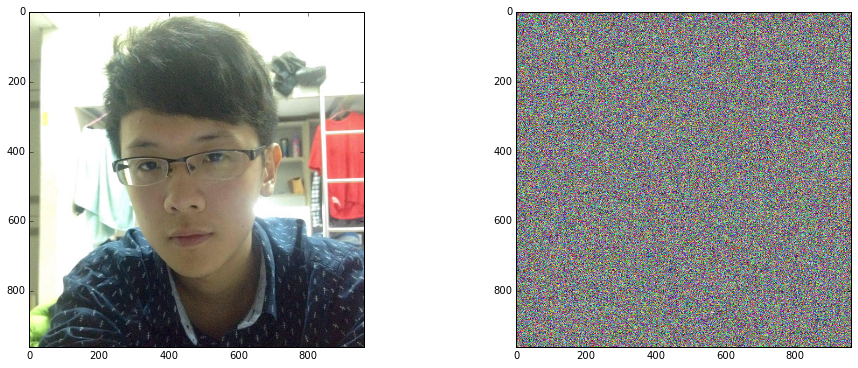

In [10]:
encrypt_image('CBC', "04CDC2BEBA7D40EF598AEC397DB983D5", "D1400E72C3E7EEDE31AC90AE91F3853B")

In [11]:
import sys
import os
import math
from collections import Counter

%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from Crypto.Cipher import AES
BLOCK_SIZE = 16

def encrypt_image(cipher_mode, key_hex, iv_hex):
    """Encrypt an image file and write out the results as a JPEG."""

    input_image = Image.open(os.getcwd() + '/yuwen.jpg')
    print input_image
    plt.figure(figsize=(16,6))
    plt.subplot(121)
    plt.imshow(input_image)

    # Key must be one of 16/24/32 bytes in length.
    if cipher_mode == 'ECB':
        mode = AES.MODE_ECB
    elif cipher_mode == 'CBC':
        mode = AES.MODE_CBC
    elif cipher_mode == 'CFB':
        mode = AES.MODE_CFB
    elif cipher_mode == 'OFB':
        mode = AES.MODE_OFB
    key = key_hex.decode("hex")
    iv  = iv_hex.decode("hex")
    aes = AES.new(key, mode, iv)

    image_string = input_image.tobytes()
    # The input string must be padded to the input block size.
    image_padding_length = BLOCK_SIZE - len(image_string) % BLOCK_SIZE
    image_string += image_padding_length * "~"

    # generate the encrypted image string
    encrypted = aes.encrypt(image_string)

    # create an image from the encrypted string
    encrypted_img = Image.frombuffer("RGB", input_image.size, encrypted, 'raw', "RGB", 0, 1)
    
    plt.subplot(122)
    plt.imshow(encrypted_img)
    plt.show()